In [1]:
import cftime
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import numpy as np
import om4labs
import cmocean as cmo
import seaborn as sb
import momlevel

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

units_conv = 1e3 * 60**2 * 24 #for converting to mmol C m-2 day-1

pwd_esm = "/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_historical_D1/gfdl.ncrc4-intel16-prod-openmp/pp"
pwd_cm = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_historical/gfdl.ncrc4-intel16-prod-openmp/pp"

pwd_esm = "/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp"
pwd_cm = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp"

## SURFACE FLUXES

### Comparing surface CO2 fluxes between ESM and CM

In [4]:
ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_cobalt_sfc/ts/monthly/5yr/ocean_cobalt_sfc.00*dic_stf_gas.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_bling_1x1deg/ts/monthly/5yr/ocean_bling_1x1deg.00*dic_stf_gas.nc", use_cftime=True)

dic_seas_esm = ds_esm.dic_stf_gas.groupby(ds_esm.time.dt.season).mean()
dic_seas_cm = ds_cm.dic_stf_gas.groupby(ds_cm.time.dt.season).mean()

#ds_esm_mean = ds_esm.dic_stf_gas.mean(dim="time")
#ds_cm_mean = ds_cm.dic_stf_gas.mean(dim="time")

fig, axs = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection':ccrs.SouthPolarStereo()})
axs = axs.flatten()

(units_conv * dic_seas_esm.sel(season="JJA")).plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True)) 
(units_conv * dic_seas_esm.sel(season="DJF")).plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True))

(units_conv * dic_seas_cm.sel(season="JJA")).plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True)) 
(units_conv * dic_seas_cm.sel(season="DJF")).plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True))
axs[0].set_title("ESM hist, JJA")
axs[1].set_title("ESM hist, DJF")
axs[2].set_title("CM hist, JJA")
axs[3].set_title("CM hist, DJF")

for i in np.arange(4):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig("/home/Katherine.Turner/piControl_seasonal_dicflux.png", format="png", dpi=100)

### Comparing surface heat fluxes between the models

In [47]:
var="hfds"

ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*{var}.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*{var}.nc", use_cftime=True)

In [48]:
seas_esm = ds_esm[var].groupby(ds_esm.time.dt.season).mean().load()
seas_cm = ds_cm[var].groupby(ds_cm.time.dt.season).mean().load()

#ds_esm_mean = ds_esm.dic_stf_gas.mean(dim="time")
#ds_cm_mean = ds_cm.dic_stf_gas.mean(dim="time")

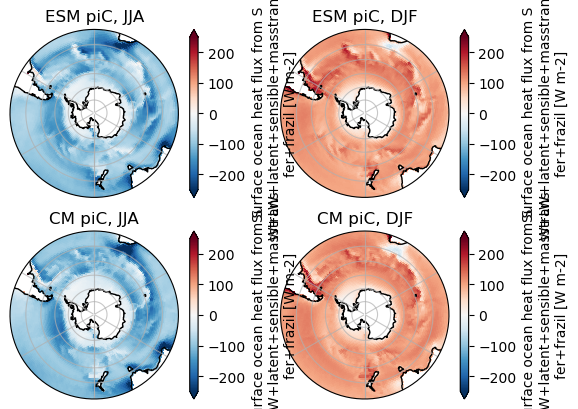

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection':ccrs.SouthPolarStereo()})
axs = axs.flatten()

seas_esm.sel(season="JJA").plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-250,
                                     vmax=250,
                                     cmap="RdBu_r"
                                  )

seas_esm.sel(season="DJF").plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-250,
                                     vmax=250,
                                     cmap="RdBu_r"
                                  )

seas_cm.sel(season="JJA").plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-250,
                                     vmax=250,
                                     cmap="RdBu_r"
                                  )

seas_cm.sel(season="DJF").plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-250,
                                     vmax=250,
                                     cmap="RdBu_r"
                                  )
axs[0].set_title("ESM piC, JJA")
axs[1].set_title("ESM piC, DJF")
axs[2].set_title("CM piC, JJA")
axs[3].set_title("CM piC, DJF")

for i in np.arange(4):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig(f"/home/Katherine.Turner/piControl_seasonal_{var}.png", format="png", dpi=100)

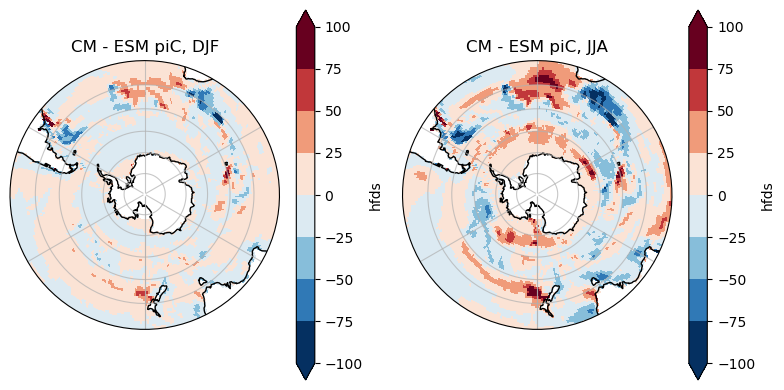

In [66]:
season = ["DJF", "JJA"]

fig, axs = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.SouthPolarStereo()}, figsize = (8,4))
axs = axs.flatten()

for i, s in enumerate(season):

    (seas_cm.sel(season=s) - seas_esm.sel(season=s)).plot(ax=axs[i], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-100,
                                     vmax=100,
                                     cmap=plt.get_cmap("RdBu_r", 8)
                                  )

    axs[i].set_title(f"CM - ESM piC, {s}")

    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
plt.savefig('/home/Katherine.Turner/piControl_hfds_diff.png', format="png", dpi=100)

## SURFACE CONDITIONS

### SST

In [121]:
ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*tos.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*tos.nc", use_cftime=True)

seas_esm = ds_esm.tos.groupby(ds_esm.time.dt.season).mean().load()
seas_cm = ds_cm.tos.groupby(ds_cm.time.dt.season).mean().load()

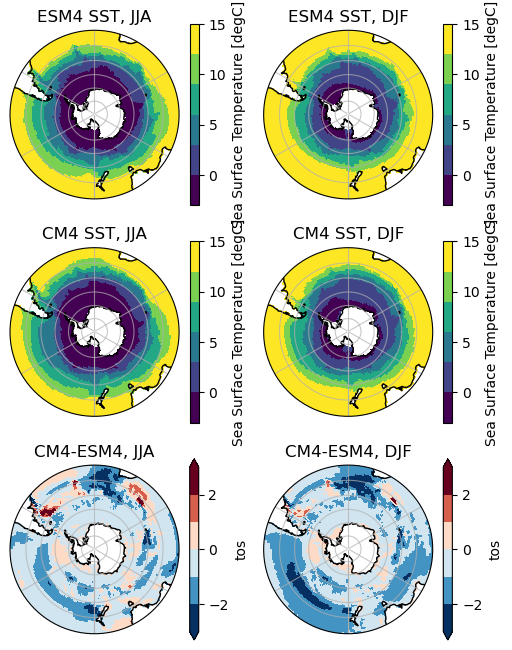

In [122]:
fig, axs = plt.subplots(ncols=2, nrows=3, subplot_kw={'projection':ccrs.SouthPolarStereo()}, figsize=(6,8))
axs = axs.flatten()

seas_esm.sel(season="JJA").plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=15, extend="neither",
                                     cmap=plt.get_cmap('viridis',6),
                                ) 
seas_esm.sel(season="DJF").plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=15, extend="neither",
                                     cmap=plt.get_cmap('viridis',6),
                                ) 

seas_cm.sel(season="JJA").plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=15, extend="neither",
                                     cmap=plt.get_cmap('viridis',6),
                                ) 
seas_cm.sel(season="DJF").plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=15, extend="neither",
                                     cmap=plt.get_cmap('viridis',6),
                                ) 

(seas_cm - seas_esm).sel(season="JJA").plot(ax=axs[4], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=3,
                                     cmap=plt.get_cmap("RdBu_r", 6),
                                ) 

(seas_cm - seas_esm).sel(season="DJF").plot(ax=axs[5], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-3,
                                     vmax=3,
                                     cmap=plt.get_cmap("RdBu_r", 6),
                                ) 


axs[0].set_title("ESM4 SST, JJA")
axs[1].set_title("ESM4 SST, DJF")
axs[2].set_title("CM4 SST, JJA")
axs[3].set_title("CM4 SST, DJF")
axs[4].set_title("CM4-ESM4, JJA")
axs[5].set_title("CM4-ESM4, DJF")

for i in np.arange(6):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig("/home/Katherine.Turner/piControl_seasonal_sst.png", format="png", dpi=100)

### MLD

In [123]:
ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*MLD_003.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.01*MLD_003.nc", use_cftime=True)

seas_esm = ds_esm.MLD_003.groupby(ds_esm.time.dt.season).mean().load()
seas_cm = ds_cm.MLD_003.groupby(ds_cm.time.dt.season).mean().load()

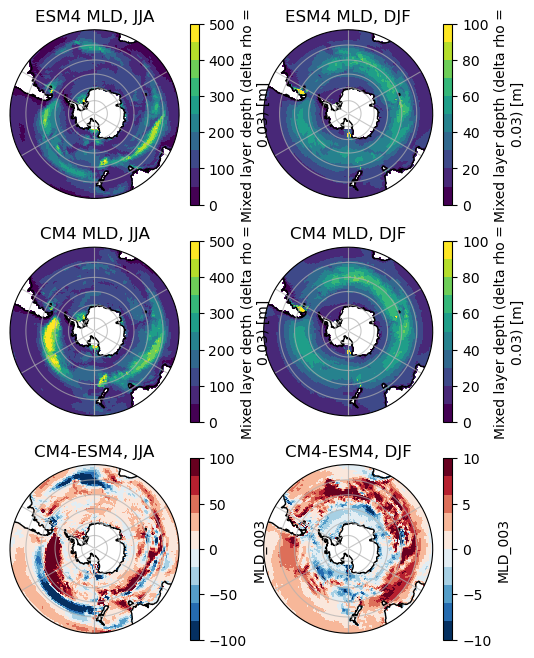

In [124]:
plot_kwargs1 = {"vmin":0, "vmax":500, "extend":"neither", "cmap":plt.get_cmap('viridis',10)}
plot_kwargs2 = {"vmin":0, "vmax":100, "extend":"neither", "cmap":plt.get_cmap('viridis',10)}
plot_kwargs3 = {"vmin":-100, "vmax":100, "extend":"neither", "cmap":plt.get_cmap('RdBu_r',10)}
plot_kwargs4 = {"vmin":-10, "vmax":10, "extend":"neither", "cmap":plt.get_cmap('RdBu_r',10)}

fig, axs = plt.subplots(ncols=2, nrows=3, subplot_kw={'projection':ccrs.SouthPolarStereo()}, figsize=(6,8))
axs = axs.flatten()

seas_esm.sel(season="JJA").plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs1,
                                ) 
seas_esm.sel(season="DJF").plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs2,
                                ) 

seas_cm.sel(season="JJA").plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs1,
                                ) 
                                
seas_cm.sel(season="DJF").plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs2,
                                ) 

(seas_cm - seas_esm).sel(season="JJA").plot(ax=axs[4], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs3,
                                ) 

(seas_cm - seas_esm).sel(season="DJF").plot(ax=axs[5], 
                                     transform=ccrs.PlateCarree(),
                                     **plot_kwargs4,
                                ) 


axs[0].set_title("ESM4 MLD, JJA")
axs[1].set_title("ESM4 MLD, DJF")
axs[2].set_title("CM4 MLD, JJA")
axs[3].set_title("CM4 MLD, DJF")
axs[4].set_title("CM4-ESM4, JJA")
axs[5].set_title("CM4-ESM4, DJF")

for i in np.arange(6):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig("/home/Katherine.Turner/piControl_seasonal_mld.png", format="png", dpi=100)

### Checking ESM4 and CM4 pCO2

In [2]:
ds2_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_cobalt_sfc/ts/monthly/5yr/ocean_cobalt_sfc.00*.pco2surf.nc", use_cftime=True)
ds2_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_bling_cmip6_omip_2d_1x1deg/ts/monthly/5yr/ocean_bling_cmip6_omip_2d_1x1deg.0*spco2.nc", use_cftime=True)

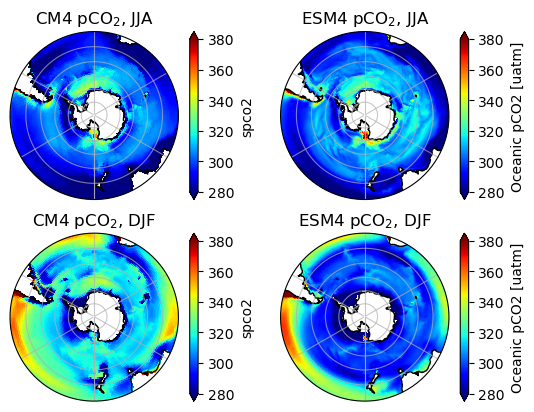

In [4]:
pco2_seas_esm = ds2_esm.pco2surf.groupby(ds2_esm.time.dt.season).mean()
pco2_seas_cm = ds2_cm.spco2.groupby(ds2_esm.time.dt.season).mean()

fig, axs = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection':ccrs.SouthPolarStereo()})
axs = axs.flatten()

(1e6/101325*pco2_seas_cm.sel(season="JJA")).plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=280,
                                     vmax=380,
                                     cmap='jet'
                                                   ) 
(pco2_seas_esm.sel(season="JJA")).plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=280,
                                     vmax=380,
                                     cmap='jet'
                                                   ) 
(1e6/101325*pco2_seas_cm.sel(season="DJF")).plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=280,
                                     vmax=380,
                                     cmap='jet'
                                                   )


(pco2_seas_esm.sel(season="DJF")).plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=280,
                                     vmax=380,
                                     cmap='jet'
                                                   )
axs[0].set_title("CM4 pCO$_2$, JJA")
axs[1].set_title("ESM4 pCO$_2$, JJA")
axs[2].set_title("CM4 pCO$_2$, DJF")
axs[3].set_title("ESM4 pCO$_2$, DJF")

for i in np.arange(4):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()

## ATMOSPHERIC CONDITIONS

### Checking ESM4 and CM4 wind velocities

In [67]:
ds_esm_wind = xr.open_mfdataset(f"{pwd_esm}/atmos/ts/monthly/5yr/atmos.01*u_ref.nc", use_cftime=True)
ds_cm_wind = xr.open_mfdataset(f"{pwd_cm}/atmos/ts/monthly/5yr/atmos.01*u_ref.nc", use_cftime=True)

In [69]:
seas_esm = ds_esm_wind.u_ref.groupby(ds_esm_wind.time.dt.season).mean().load()
seas_cm = ds_cm_wind.u_ref.groupby(ds_cm_wind.time.dt.season).mean().load()

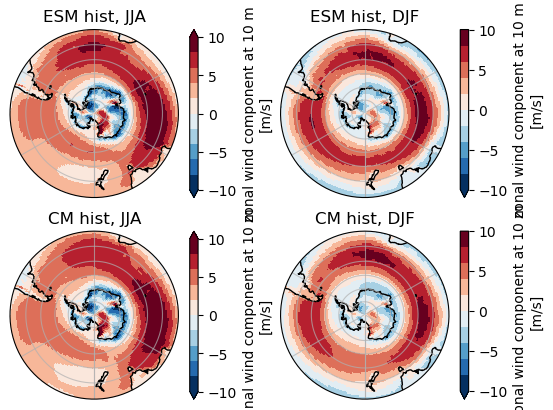

In [72]:
fig, axs = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection':ccrs.SouthPolarStereo()})
axs = axs.flatten()

seas_esm.sel(season="JJA").plot(ax=axs[0], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=plt.get_cmap("RdBu_r", 10)
                               ) 
seas_esm.sel(season="DJF").plot(ax=axs[1], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=plt.get_cmap("RdBu_r", 10)
                               )

seas_cm.sel(season="JJA").plot(ax=axs[2], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=plt.get_cmap("RdBu_r", 10)
                              ) 
seas_cm.sel(season="DJF").plot(ax=axs[3], 
                                     transform=ccrs.PlateCarree(),
                                     vmin=-10,
                                     vmax=10,
                                     cmap=plt.get_cmap("RdBu_r", 10)
                              )
axs[0].set_title("ESM hist, JJA")
axs[1].set_title("ESM hist, DJF")
axs[2].set_title("CM hist, JJA")
axs[3].set_title("CM hist, DJF")

for i in np.arange(4):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig("/home/Katherine.Turner/piControl_seasonal_winds.png", format="png", dpi=100)

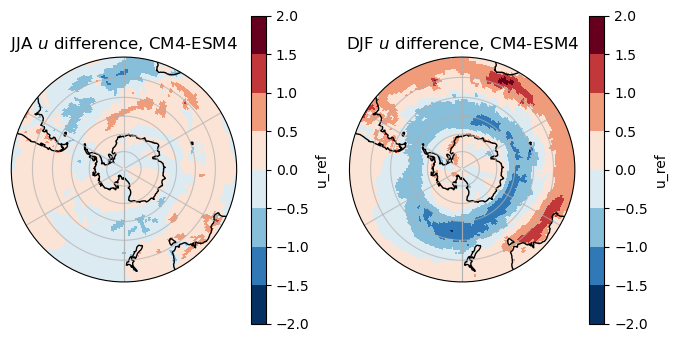

In [77]:
season = ["JJA", "DJF"]
fig, axs = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.SouthPolarStereo()}, figsize = (8,4))
axs = axs.flatten()

for i, s in enumerate(season):
    (seas_cm.sel(season=s) - seas_esm.sel(season=s)).plot(ax=axs[i],
                                                          transform=ccrs.PlateCarree(),
                                                          vmin=-2, vmax=2, extend="neither",
                                                          cmap=plt.get_cmap("RdBu_r", 8)
                                                         )
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    axs[i].set_title(f"{s} $u$ difference, CM4-ESM4")
plt.savefig("/home/Katherine.Turner/piControl_seasonal_winds_difference.png", format="png", dpi=100)

## VERTICAL PROFILES

### DIC

In [23]:
ds3_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_cobalt_omip_tracers_year_z_1x1deg/ts/annual/5yr/ocean_cobalt_omip_tracers_year_z_1x1deg.01*.dissic.nc", use_cftime=True)
ds3_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_bling_cmip6_omip_tracers_year_z_1x1deg/ts/annual/5yr/ocean_bling_cmip6_omip_tracers_year_z_1x1deg.01*dissic.nc", use_cftime=True)

(3000.0, 0.0)

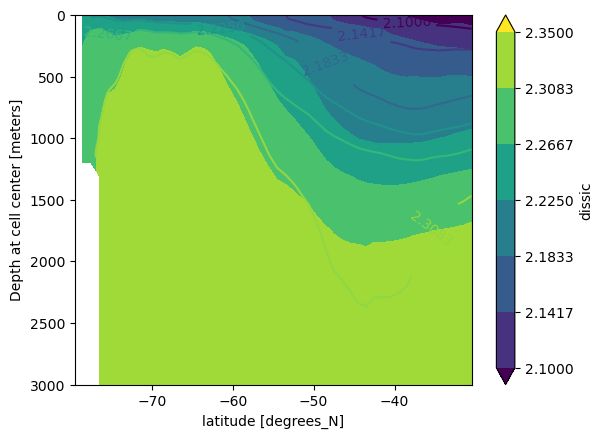

In [24]:
fig, ax = plt.subplots()
ds3_cm.dissic.mean({"time", "lon"}).sel(lat=slice(-80,-30)).plot.contourf(vmin=2.1, vmax=2.35)
CS = ds3_esm.dissic.mean({"time", "lon"}).sel(lat=slice(-80,-30)).plot.contour(vmin=2.1, vmax=2.35)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.ylim([3000, 0])

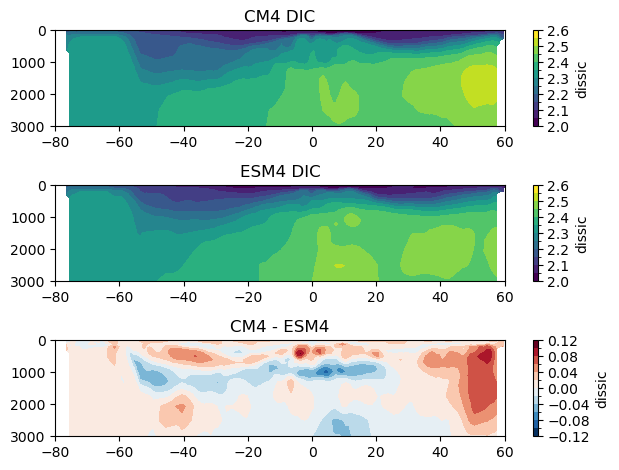

In [25]:
titles = ["CM4 DIC", "ESM4 DIC", "CM4 - ESM4"]
fig, axs = plt.subplots(nrows=3, ncols=1)
axs=axs.flatten()
ds3_cm.dissic[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[0], levels=13, 
                                                                                         vmin=2, vmax=2.6, extend="neither")
ds3_esm.dissic[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[1], levels=13, 
                                                                                          vmin=2, vmax=2.6, extend="neither")
(ds3_cm.dissic[-15:-10] - ds3_esm.dissic[-15:-10]).mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[2], 
                                                                                                                     levels=13,
                                                                                                    )

for i in np.arange(3):
    axs[i].set_ylim([3000, 0])
    axs[i].set_xlim([-80,60])
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(titles[i])
    
plt.tight_layout()
plt.savefig("/home/Katherine.Turner/DIC_pac_150w.png", format="png", dpi=100)

In [26]:
pwd_glodap = "/archive/cm6/datasets/ESM4/OBGC/GLODAPv2"
ds_glodap = xr.open_dataset(f"{pwd_glodap}/GLODAPv2.2016b.oi-filled.20180322.nc", decode_times=False)
glodap_dic = ds_glodap.TCO2.squeeze('time')

glodap_interp = (1035/1e6*glodap_dic).interp(latitude=ds3_cm.lat.data, depth=ds3_cm.z_l.data)

glodap_150 = glodap_interp.sel(longitude=360-150,method="nearest").data
cm4_150 = ds3_cm.dissic[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").data
esm4_150 = ds3_esm.dissic[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").data

#cm4_150 = ds3_cm.dissic[0].sel(lon=360-150, method="nearest").data
#esm4_150 = ds3_esm.dissic[0].sel(lon=360-150, method="nearest").data

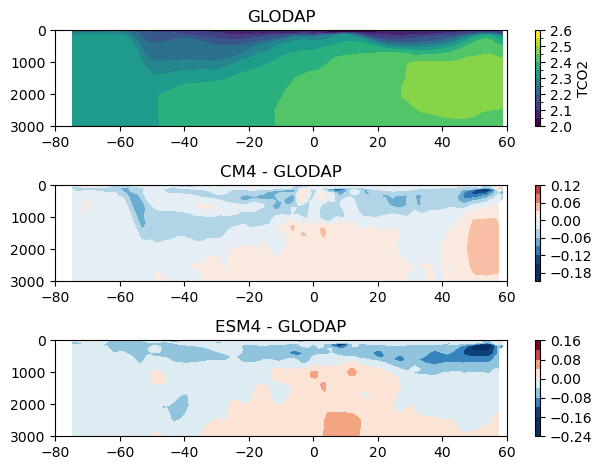

In [29]:
titles = ["GLODAP", "CM4 - GLODAP", "ESM4 - GLODAP"]
fig, axs = plt.subplots(nrows=3, ncols=1)
axs=axs.flatten()

glodap_interp.sel(longitude=360-150,method="nearest").plot.contourf(ax=axs[0], levels=13, vmin=2, vmax=2.6, extend="neither")
d1 = axs[1].contourf(ds3_cm.lat.data, ds3_cm.z_l.data, cm4_150 - glodap_150, vmin=-0.15, vmax=0.15, levels=11, cmap="RdBu_r")
d2 = axs[2].contourf(ds3_cm.lat.data, ds3_cm.z_l.data, esm4_150 - glodap_150, vmin=-0.15, vmax=0.15, levels=11, cmap="RdBu_r")

plt.colorbar(d1, ax=axs[1])
plt.colorbar(d2, ax=axs[2])


for i in np.arange(3):
    axs[i].set_ylim([3000, 0])
    axs[i].set_xlim([-80,60])
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(titles[i])
    
plt.tight_layout()
plt.savefig("/home/Katherine.Turner/DIC_pac_150w_GLODAP.png", format="png", dpi=100)

## Temperature

In [125]:
ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_annual_z_1x1deg/ts/annual/5yr/ocean_annual_z_1x1deg.01*.thetao.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_annual_z_1x1deg/ts/annual/5yr/ocean_annual_z_1x1deg.01*thetao.nc", use_cftime=True)

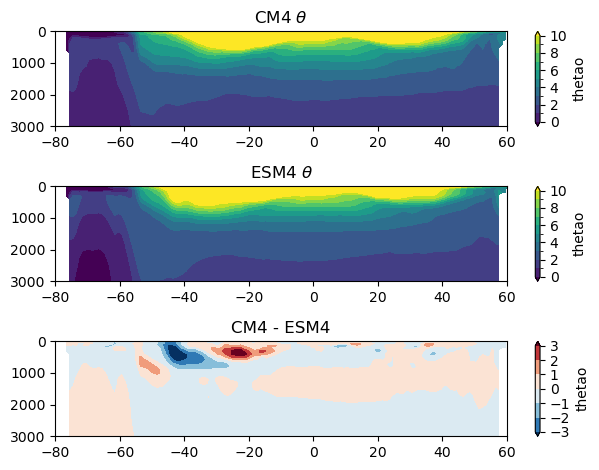

In [135]:
titles = [r"CM4 $\theta$", r"ESM4 $\theta$", "CM4 - ESM4"]
fig, axs = plt.subplots(nrows=3, ncols=1)
axs=axs.flatten()
ds_cm.thetao[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[0], vmin=0, vmax=10, levels=11)
ds_esm.thetao[-15:-10].mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[1], vmin=0, vmax=10, levels=11)
(ds_cm.thetao[-15:-10] - ds_esm.thetao[-15:-10]).mean(dim="time").sel(lon=360-150, method="nearest").plot.contourf(ax=axs[2], vmin=-3, vmax=3, levels=7,cmap="RdBu_r")

for i in np.arange(3):
    axs[i].set_ylim([3000, 0])
    axs[i].set_xlim([-80,60])
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(titles[i])
    
plt.tight_layout()
plt.savefig("/home/Katherine.Turner/thetao_pac_150w.png", format="png", dpi=100)

In [140]:
ds_esm = xr.open_mfdataset(f"{pwd_esm}/ocean_cobalt_omip_tracers_month_z_1x1deg/ts/monthly/5yr/ocean_cobalt_omip_tracers_month_z_1x1deg.01*.pp.nc", use_cftime=True)
ds_cm = xr.open_mfdataset(f"{pwd_cm}/ocean_bling_cmip6_omip_tracers_month_z_1x1deg/ts/monthly/5yr/ocean_bling_cmip6_omip_tracers_month_z_1x1deg.01*pp.nc", use_cftime=True)

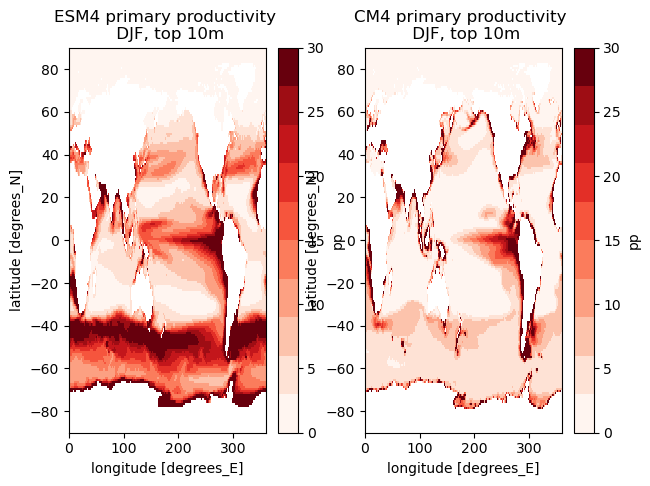

In [156]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(7,5))
(units_conv* 10 * ds_esm.pp.groupby(ds_esm.time.dt.season).mean().sel(season="DJF")[0,:,:]).plot(ax=axs[0], vmin=0, vmax=30, cmap=plt.get_cmap("Reds",10), extend="neither")

(units_conv* 10* ds_cm.pp.groupby(ds_esm.time.dt.season).mean().sel(season="DJF")[0,:,:]).plot(ax=axs[1], vmin=0, vmax=30, cmap=plt.get_cmap("Reds",10), extend="neither")

axs[0].set_title("ESM4 primary productivity \n DJF, top 10m")
axs[1].set_title("CM4 primary productivity \n DJF, top 10m")

plt.savefig("/home/Katherine.Turner/piC_pp.png", format="png", dpi=100, bbox_inches="tight")